In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
#importing inbuit functions
import warnings
warnings.filterwarnings('ignore')

### Checkpoint 1


In [2]:
companies=pd.read_csv('companies.csv',encoding='palmos')

round2=pd.read_csv('rounds2.csv',encoding='palmos')
# importing datasets with palmos encoding

In [3]:
print(companies.shape)
print(round2.shape)
#getting shape of the datasets

(66368, 10)
(114949, 6)


In [4]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
round2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
companies['permalink'].unique().shape
# getting distinct no. of records in Companies DataFrame
# There are no duplicates in the Companies DataFrame

(66368,)

Permalink is the unique column in the comapnies dataframe, Given that it is the unique key of the table, it has 66368 records  
Let's see how many unique records are present in round2 dataframe

In [7]:
round2['company_permalink'].unique().shape
# Getting distinct no. of records in round2 DataFrame

(90247,)

We can see that there are 90247 number of unique records in the round2 dataframe, but if we clearly observe the records they are not in a standardize manner  

Let's convert all the entries into lower case

In [8]:
companies.permalink=companies.permalink.str.lower()
round2.company_permalink=round2.company_permalink.str.lower()
#changing the data in columns into lower case

In [9]:
companies['permalink'].unique().shape
# getting distinct no. of records in Companies DataFrame
# There are no duplicates in the Companies DataFrame

(66368,)

In [10]:
round2['company_permalink'].unique().shape
# Getting distinct no. of records in round2 DataFrame

(66368,)

Now, We can see the same number of records in both dataframes.  
Let's see if there are any records in round2 dataframe which might not be in companies dataframe

In [11]:
set(companies.permalink)-set(round2.company_permalink)
# The above expression gives the records which are not in common
# lets see if there are any companies present in round2 which are not in companies


set()

    Thus, The companies present in round2 and companies dataframe are same
    

In [12]:
master_frame=pd.merge(round2,companies,left_on='company_permalink',right_on='permalink')
# Merging the Two data frames 


In [13]:
master_frame.drop('permalink',axis=1,inplace=True)
# removing since there are two same columns

In [14]:
master_frame.name=master_frame.name.str.replace('#','')
# there are some company names starting with '#'

In [15]:
master_frame.shape

(114949, 15)

The Observations present in master_frame are 114949

### Data cleaning

In [16]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(14)
memory usage: 14.0+ MB


In [17]:
master_frame.isnull().sum()
# getting sum of missing values in each column

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [18]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)
# getting percentage of missing values in each column

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

###### we have almost 70% missing values in funding_round_code column, we just can't impute the missing values with mode.However this column does not seems to be an important one which would impact the analysis. Therefore removing the column.

In [19]:
# master_frame.funding_round_code=master_frame.funding_round_code.fillna(master_frame.funding_round_code.mode()[0]).
master_frame.drop('funding_round_code',axis=1,inplace=True)

In [20]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)
# getting percentage of missing values in each column

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

    we can see that columns: raised_amount_usd, country_code, category_list  are important
    Let's see how we can handle missing values in these columns

###### The column raised_amount _usd has 17% missing values,This is the important column to analyse, if we try impute them with median or mean it may result in biasing
    Let's see if mean or median can be considered for imputing values

In [21]:
master_frame.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


The median is around 1M USD where as the mean is about 10M USD. Since there is huge difference between them removing the missing values would be great choice

In [22]:
master_frame=master_frame[~(master_frame['raised_amount_usd'].isnull())]


In [23]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)
# getting percentage of missing values in each column

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd           0.00
name                        0.00
homepage_url                4.56
category_list               1.10
status                      0.00
country_code                6.16
state_code                  8.01
region                      7.42
city                        7.42
founded_at                 16.81
dtype: float64

In [24]:
master_frame.isnull().sum()
# getting sum of missing values in each column

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd              0
name                           1
homepage_url                4332
category_list               1044
status                         0
country_code                5851
state_code                  7604
region                      7048
city                        7045
founded_at                 15966
dtype: int64

Now considering Country_code column, we will just see distribution of values of this categorical variable

In [25]:
master_frame.country_code.value_counts()[:15]
# Gettimg the count of records for each country

USA    62049
GBR     5019
CAN     2616
CHN     1927
IND     1649
FRA     1451
ISR     1364
ESP     1074
DEU     1042
AUS      649
RUS      588
IRL      563
SWE      560
SGP      546
NLD      532
Name: country_code, dtype: int64

###### The country code column has 6 % missing values i.e 5851 rows which is equivalent to one individual country records like (GBR). we just can't impute the missing values with the mode i.e 'USA' which would result in increasing the average value of  that particular category which is biasing 
###### Checking if removal of these values are affecting the funding_round type column

In [26]:
master_frame.groupby('funding_round_type').mean()
# the average of the funding round type before removing missing values of country_code

,raised_amount_usd
funding_round_type,
angel,9.586945e+05
convertible_note,1.453439e+06
debt_financing,1.704353e+07
equity_crowdfunding,5.383682e+05
grant,4.300576e+06
non_equity_assistance,4.112031e+05
post_ipo_debt,1.687046e+08
post_ipo_equity,8.218249e+07
private_equity,7.330859e+07


In [27]:
# Removing the records having country_code as missing values 
master_frame=master_frame[~(master_frame['country_code'].isnull())]

In [28]:
master_frame.groupby('funding_round_type').mean()

,raised_amount_usd
funding_round_type,
angel,9.685599e+05
convertible_note,1.331938e+06
debt_financing,1.718640e+07
equity_crowdfunding,5.109480e+05
grant,4.508473e+06
non_equity_assistance,4.714459e+05
post_ipo_debt,1.694518e+08
post_ipo_equity,6.601879e+07
private_equity,7.361856e+07


##### Even after removing the missing values, the funding_round_type didn't get affected much which is obvious, hence removing those values would be better option

In [29]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)
# getting percentage of missing values in each column

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd           0.00
name                        0.00
homepage_url                3.79
category_list               0.65
status                      0.00
country_code                0.00
state_code                  1.97
region                      1.34
city                        1.34
founded_at                 15.33
dtype: float64

##### Category_list has about 0.65 % of missing values, let's see if we can impute them or not

In [30]:
master_frame.category_list.value_counts()

Biotechnology                                                                                                                      7621
Software                                                                                                                           5659
Health Care                                                                                                                        2033
Clean Technology                                                                                                                   1846
Mobile                                                                                                                             1733
E-Commerce                                                                                                                         1624
Hardware + Software                                                                                                                1580
Enterprise Software                             

##### There are wide variety categories in the list, we just can't select the top most category and impute missing values with it. Hence removing the missing values would be the best option
    Also we have enough data,removing the missing values of this category_list column wouldn't impact the analysis

In [31]:
master_frame=master_frame[~(master_frame['category_list'].isnull())]

# not imputing because there are many categories and imputing to one value would create bias
# as it has 0.6 % the dataset shouldn't be effected.

In [32]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)
# getting percentage of missing values in each column

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd           0.00
name                        0.00
homepage_url                3.67
category_list               0.00
status                      0.00
country_code                0.00
state_code                  1.96
region                      1.34
city                        1.33
founded_at                 15.10
dtype: float64

#### We have dealt with all the important columns, there are some other columns having missing values, As removing or imputing these records wouldn't affect the analysis, we can remove those columns


In [33]:
master_frame.drop(['homepage_url','state_code','region','city','founded_at'],axis=1,inplace=True)

In [34]:
master_frame.shape

(88529, 9)

    Thus, after handlng the missing values master_frame has 88529 observations


### Checkpoint 2- Funding Type Analysis

In [35]:
mf=master_frame.copy()
# saving the duplicate copy of master_frame for future use

In [36]:
master_frame=master_frame[master_frame['funding_round_type'].isin(['angel','seed','private_equity','venture'])]

In [37]:
master_frame.shape

(75124, 9)

 Considering the constraints of Spark funds we can choose mean as most represtative value   
Let's see how raised_amount_usd values are distributed

In [38]:
round(master_frame.pivot_table(index='funding_round_type',values='raised_amount_usd',aggfunc=[np.mean,'count']))

,mean,count
,raised_amount_usd,raised_amount_usd
funding_round_type,,
angel,971574.0,4400
private_equity,73938486.0,1820
seed,747794.0,21095
venture,11724223.0,47809


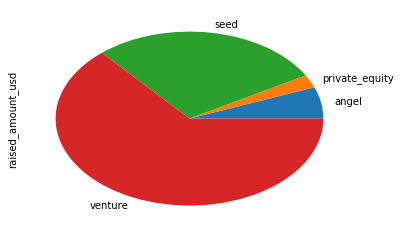

In [39]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].count().plot.pie()

######  we can consider MEAN as most representative value

    Private-equity has the highest average value, but as per Spark funds requirements we can see  Venture is having average(mean)value between (5M to 15M) and even the count of investments in Ventures are   way more than any other funding type. The average amount of seed and angel are lower  than the given considerable range
    
    Given the strategy that Spark Funds wants to invest where most other investors are investing,ventures type would be the  ideal one 
    
#####   Based on Analysis Venture type of investment would be most suitable one for Spark funds

### Checkpoint 3 - Country Analysis

In [40]:
master_frame=master_frame[master_frame['funding_round_type']=='venture']
# filtering the chosen investment type

In [41]:
master_frame.country_code.unique().shape
# There are 97 countries for this chosen investment type

(97,)

In [42]:
top9=master_frame[master_frame['funding_round_type']=='venture'].groupby('country_code').sum().sort_values(by='raised_amount_usd',ascending=False)[:9]
top9
# we need the top9 countries which has received highest amount of the total funding for chosen investment type - Venture

,raised_amount_usd
country_code,
USA,4.200680e+11
CHN,3.933892e+10
GBR,2.007281e+10
IND,1.426151e+10
CAN,9.482218e+09
FRA,7.226851e+09
ISR,6.854350e+09
DEU,6.306922e+09
JPN,3.167647e+09


As china doesn't come under English speaking country we need to exclude that

    The top 3 English speaking countries are USA, Great Britan, India

In [43]:
master_frame.shape

(47809, 9)

### Checkpoint 4- Sector Analysis I

In [44]:
mapping=pd.read_csv('mapping.csv')
# importing mapping file

In [45]:
# the mapping file has some values such as Analytics as A0lytics 
# na is replaced by 0 in many values

# We are replacing '0' by 'na'
mapping['category_list']=mapping['category_list'].str.replace('0','na')

# After the replacement of the records as above , It is found that enterprise 2.0 is changed as enterprice 2.na 
mapping['category_list']=mapping['category_list'].str.replace('Enterprise 2.na','Enterprise 2.0')
# hence changing it to it's correctname


In [46]:
# conerting the dummy variables to categorical variable- main_sector

column1=mapping.columns # getting all the columns as a list for comparing 
column1=column1.drop('category_list') # removing first column from the list

for col in column1:
    mapping.loc[mapping[col]==1,'main_sector']=col
# compares every column and returns the column name which has value '1' in each row

In [47]:
mapping.head(3)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
0,NaN,0,1,0,0,0,0,0,0,0,Blanks
1,3D,0,0,0,0,0,1,0,0,0,Manufacturing
2,3D Printing,0,0,0,0,0,1,0,0,0,Manufacturing


In [48]:
mapping=mapping[['category_list','main_sector']]

#Taking only category name and its main sector

In [49]:
master_frame['primary_sector']=master_frame['category_list'].str.split('|').str.get(0)
# Getting first word (primary sector) from the category in the master_frame

In [50]:

mapping.category_list=mapping.category_list.str.lower()
master_frame.primary_sector=master_frame.primary_sector.str.lower()
#  to match both the columns, changing them to lower case

In [51]:
mapping.set_index('category_list',inplace=True)
# setting category_list as index for easy merging(to get rid of two duplicate category list columns in dataframe after merging)

In [52]:
final_df=pd.merge(master_frame,mapping[['main_sector']],left_on='primary_sector',right_on='category_list',how='left')
# merging the primary sector in masterframe with it's main sector from mapping dataframe

In [53]:
final_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,fame,Media,operating,IND,media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,0-6.com,Curated Web,operating,CHN,curated web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"


In [54]:
final_df[final_df.main_sector.isnull()][['raised_amount_usd','primary_sector']]
# there are some primary sectors which are not mapped in mapping file.


,raised_amount_usd,primary_sector
3783,20000.0,english-speaking
7812,50000.0,enterprise hardware
9070,125000.0,natural gas uses
12521,250000.0,adaptive equipment
15284,68569234.0,racing
15578,194000000.0,specialty retail
18452,9486929.0,biotechnology and semiconductor
22070,862000.0,rapidly expanding
29589,3172815.0,product search
36850,2499999.0,greentech


    we have almost 13 primary sectors which are not mapped to any of the main sectors
    let's see if we can impute them 

In [55]:
final_df.main_sector.value_counts()

Others                                     11416
Cleantech / Semiconductors                 10055
Social, Finance, Analytics, Advertising     9629
News, Search and Messaging                  5970
Health                                      3958
Manufacturing                               3281
Entertainment                               2752
Automotive & Sports                          735
Name: main_sector, dtype: int64

    we have an option to impute them in 'Others' category, but again it might create bias
    Hence removing them

In [56]:
final_df=final_df[~(final_df['main_sector'].isnull())]

In [57]:
final_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,fame,Media,operating,IND,media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,0-6.com,Curated Web,operating,CHN,curated web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"


### Checkpoint 5 - Sector Analysis II

In [62]:
final_df=final_df[(final_df.raised_amount_usd>=5000000) &(final_df.raised_amount_usd<=15000000)]
# Spark funds want the data in range between 5 Million and 15 Million, So taking the range as[5000000,15000000]

In [63]:
final_df.shape

(15770, 11)

In [64]:
# TOP English Speaking country is USA
D1=final_df[final_df.country_code=='USA']
# TOP second English Speaking country is GBR
D2=final_df[final_df.country_code=='GBR']
# TOP Third English Speaking country is IND
D3=final_df[final_df.country_code=='IND']

In [65]:
print(D1.shape)
print(D2.shape)
print(D3.shape)

(12063, 11)
(621, 11)
(328, 11)


    We need to create Three different dataframes with all the columns of the master_frame along with the primary sector,main sector, total number of investments, total amount invested in seperate columns

In [66]:
# for country1
co1=D1.pivot_table(index='main_sector',values=['raised_amount_usd','country_code'],aggfunc={'raised_amount_usd':'sum','country_code':'count'}).rename(columns={'raised_amount_usd': 'investment_amount', 'country_code': 'count_of_investments'})
# Getting count and sum of investments for each sector from D1

D1=pd.merge(D1,co1[['count_of_investments','investment_amount']],left_on='main_sector',right_on='main_sector') 
# Merging count and sum with the main dataframe

D1=D1.sort_values(by=['count_of_investments','raised_amount_usd'],ascending=False)

# sorting the records by count_ and then raised_amount_usd

In [67]:
# for country2
co2=D2.pivot_table(index='main_sector',values=['raised_amount_usd','country_code'],aggfunc={'raised_amount_usd':'sum','country_code':'count'}).rename(columns={'raised_amount_usd': 'investment_amount', 'country_code': 'count_of_investments'})
# Getting count and sum of investments for each sector

D2=pd.merge(D2,co2[['count_of_investments','investment_amount']],left_on='main_sector',right_on='main_sector') # merging count and sum of main sector
# Merging them with the main dataframe

D2=D2.sort_values(by=['count_of_investments','raised_amount_usd'],ascending=False)
# sorting the records by count_ and then raised_amount_usd

In [68]:
# for country3
co3=D3.pivot_table(index='main_sector',values=['raised_amount_usd','country_code'],aggfunc={'raised_amount_usd':'sum','country_code':'count'}).rename(columns={'raised_amount_usd': 'investment_amount', 'country_code': 'count_of_investments'})
# Getting count and sum of investments for each sector

D3=pd.merge(D3,co3[['count_of_investments','investment_amount']],left_on='main_sector',right_on='main_sector') # merging count and sum of main sector
# Merging them with the main dataframe

D3=D3.sort_values(by=['count_of_investments','raised_amount_usd'],ascending=False)
# sorting the records by count_ and then raised_amount_usd

    Using these Dataframes calculating the total count and amount of investments in each main sector.

In [69]:
final=pd.concat([D1,D2,D3])

In [70]:
final.shape

(13012, 13)

In [71]:
final[['main_sector','count_of_investments','investment_amount']].drop_duplicates().groupby('main_sector').sum().sort_values(by='count_of_investments',ascending=False)

,count_of_investments,investment_amount
main_sector,,
Others,3207,2.861804e+10
"Social, Finance, Analytics, Advertising",2907,2.544733e+10
Cleantech / Semiconductors,2500,2.296280e+10
"News, Search and Messaging",1708,1.502115e+10
Health,952,8.594137e+09
Manufacturing,862,7.821394e+09
Entertainment,680,5.862813e+09
Automotive & Sports,196,1.758056e+09


##### Using Plotly charts to get better and interactive data visualization
  

In [72]:
px.bar(final.groupby(by='main_sector')['raised_amount_usd'].sum().sort_values(ascending=False))

    The sectors 'Others','Social, Finance, Analytics, Advertising', 'Cleantech / Semiconductors' are recommended 

In [73]:
# Results

In [74]:
print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())

12063
621
328


In [75]:
print(D1.raised_amount_usd.sum())
print(D2.raised_amount_usd.sum())
print(D3.raised_amount_usd.sum())

107757097294.0
5379078691.0
2949543602.0


### Let's analyse sector-wise analysis for country USA 

##### Using Plotly charts to get better and interactive data visualization
  

In [76]:
px.bar(D1.groupby(by='main_sector')['raised_amount_usd'].sum().sort_values(ascending=False))

In [77]:
# Getting whole information of the top 3 sectors in USA
D1.groupby(by='main_sector').head(1).head(3)
# As the D1 is already sorted in the descending order of(count_, raised_amount_usd), 
# by using above expression
#                     we can get the Top 3 Sectors of all the 8 sectors shown
#                     We get the number of investments made in top 3 sectors

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector,count_of_investments,investment_amount
4301,/organization/1stdibs,/funding-round/292b074d073fdd9c7e9d8f372c3aa5f6,venture,24-01-2014,15000000.0,1stdibs,E-Commerce,operating,USA,e-commerce,Others,2950,2.632101e+10
82,/organization/admeld,/funding-round/7d10fd020854b38f176eca804373ba35,venture,01-08-2010,15000000.0,Admeld,Advertising|Auctions|Software,acquired,USA,advertising,"Social, Finance, Analytics, Advertising",2714,2.380738e+10
8057,/organization/480-biomedical,/funding-round/23d30096c6c31691dff8ff1b782eeba2,venture,14-02-2012,15000000.0,480 Biomedical,Biotechnology,operating,USA,biotechnology,Cleantech / Semiconductors,2350,2.163343e+10


##### We can see that top 3  main sectors in USA are 'Others','Social, Finance, Analytics, Advertising', 'Cleantech / Semiconductors'
    Let's see the companies which made highest investment in these top 3 sectors

In [78]:
# getting company which made highest investment in OTHERS sector
D1[D1['main_sector']=='Others'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(3)


main_sector  company_permalink              
Others       /organization/virtustream          64300000.0
             /organization/capella              54968051.0
             /organization/airtight-networks    54201907.0
Name: raised_amount_usd, dtype: float64

In [79]:
# getting company which made highest investment in Social, Finance, Analytics, Advertising sector
D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(3)

main_sector                              company_permalink        
Social, Finance, Analytics, Advertising  /organization/shotspotter    67933006.0
                                         /organization/demandbase     63000000.0
                                         /organization/intacct        61800000.0
Name: raised_amount_usd, dtype: float64

### Let's analyse sector-wise analysis for country GBR

##### Using Plotly charts to get better and interactive data visualization
  

In [80]:
px.bar(D2.groupby(by='main_sector')['raised_amount_usd'].sum().sort_values(ascending=False))

In [81]:
# Getting whole information of the top 3 sectors in GBR
D2.groupby(by='main_sector').head(1).head(3)
# As the D2 is already sorted in the descending order of(count_, raised_amount_usd), 
# by using above expression
#                     we can get the Top 3 Sectors of all the 8 sectors shown
#                     We get the number of investments made in top 3 sectors

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector,count_of_investments,investment_amount
426,/organization/azure-solutions,/funding-round/adb99f479490e33281ab358ba9da2b29,venture,16-06-2005,15000000.0,Azure Solutions,Software,acquired,GBR,software,Others,147,1.283624e+09
75,/organization/mythings,/funding-round/33b07317347464878c1fd06c79a18e8c,venture,20-03-2012,15000000.0,myThings,Accounting|Advertising|Performance Marketing,operating,GBR,accounting,"Social, Finance, Analytics, Advertising",133,1.089404e+09
194,/organization/anadigm,/funding-round/d66a723ef94efb39e450f62b6df312c4,venture,02-10-2003,15000000.0,Anadigm,Semiconductors|Technology,closed,GBR,semiconductors,Cleantech / Semiconductors,130,1.163990e+09


##### We can see that top 3  main sectors in GBR are 'Others','Social, Finance, Analytics, Advertising', 'Cleantech / Semiconductors'
    Let's see the companies which made highest investment in these top 3 sectors

In [82]:
# getting company which made highest investment in OTHERS sector
D2[D2['main_sector']=='Others'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(3)


main_sector  company_permalink           
Others       /organization/electric-cloud    37000000.0
             /organization/sensage           36250000.0
             /organization/enigmatic         32500000.0
Name: raised_amount_usd, dtype: float64

In [83]:
# getting company which made highest investment in Social, Finance, Analytics, Advertising sector
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(3)

main_sector                              company_permalink                  
Social, Finance, Analytics, Advertising  /organization/celltick-technologies    37500000.0
                                         /organization/mythings                 34000000.0
                                         /organization/zopa                     32900000.0
Name: raised_amount_usd, dtype: float64

### Let's analyse sector-wise analysis for country India

##### Using Plotly charts to get better and interactive data visualization
  

In [84]:
px.bar(D3.groupby(by='main_sector')['raised_amount_usd'].sum().sort_values(ascending=False))

In [85]:
# Getting whole information of the top 3 sectors in IND
D3.groupby(by='main_sector').head(1).head(3)
# As the D3 is already sorted in the descending order of(count_, raised_amount_usd), 
# by using above expression
#                     we can get the Top 3 Sectors of all the 8 sectors shown
#                     We get the number of investments made in top 3 sectors

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector,count_of_investments,investment_amount
43,/organization/caratlane,/funding-round/ead9f057edb0d007c54f76e5cf5f2375,venture,13-05-2013,15000000.0,CaratLane,E-Commerce|Jewelry,operating,IND,e-commerce,Others,110,1.013410e+09
148,/organization/apnaloan,/funding-round/43f871c060118fcdf5316b3bf0797618,venture,01-12-2007,15000000.0,ApnaPaisa,Credit|Finance|Marketplaces,operating,IND,credit,"Social, Finance, Analytics, Advertising",60,5.505496e+08
264,/organization/mobile2win-india,/funding-round/50396c66ef239f1d5afea76ca98a76c4,venture,13-11-2006,15000000.0,Mobile2Win India,Mobile,operating,IND,mobile,"News, Search and Messaging",52,4.338345e+08


##### We can see that top 3  main sectors in India are  'Others','Social, Finance, Analytics, Advertising','News, Search and Messaging',
    Let's see the companies which made highest investment in these top 3 sectors

In [86]:
# getting company which made highest investment in OTHERS sector
D3[D3['main_sector']=='Others'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(3)


main_sector  company_permalink         
Others       /organization/firstcry-com    39000000.0
             /organization/myntra          38000000.0
             /organization/commonfloor     32900000.0
Name: raised_amount_usd, dtype: float64

In [87]:
# getting company which made highest investment in Social, Finance, Analytics, Advertising sector
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(3)

main_sector                              company_permalink            
Social, Finance, Analytics, Advertising  /organization/manthan-systems    50700000.0
                                         /organization/komli-media        28000000.0
                                         /organization/shopclues-com      25000000.0
Name: raised_amount_usd, dtype: float64

#### Based on the Analysis :


#### 1. Venture is most suitable Funding type
#### 2. The countries USA,GBR,IND are recommended to invest
#### 3.  The most Prevailing sectors are Others and Social, Finance, Analytics, Advertising 

### Checkpoint 6-  Plots

    Plot 1.

In [88]:

# mf is duplicate copy of master_frame even before filtering the funding types (angel, seed, venture,private_equity),
# i.e it consists all the funding types

df2=mf.pivot_table(index='funding_round_type',values=['raised_amount_usd','country_code'],aggfunc={'raised_amount_usd':'sum','country_code':'count'}).rename(columns={'raised_amount_usd': 'investment_amount', 'country_code': 'count_of _investments'})
# getting sum and count for all the funding types

df2['total_amount']=mf['raised_amount_usd'].sum()
# A column for total ammount invested to calculate the fraction

df2['fraction']=df2['investment_amount']/mf['raised_amount_usd'].sum()
#getting the fraction of investments made for all the investments types


df2['average']=mf.groupby('funding_round_type').mean()
# getting average for all the investments types
df2.reset_index(inplace=True)

df2= df2[df2['funding_round_type'].isin(['angel','seed','venture','private_equity'])].sort_values(by='fraction',ascending=False)
# Filtering because we need only these four major funding types

In [89]:
# 
df2


,funding_round_type,count_of _investments,investment_amount,total_amount,fraction,average
13,venture,47809,5.605234e+11,9.272394e+11,0.604508,1.172422e+07
8,private_equity,1820,1.345680e+11,9.272394e+11,0.145128,7.393849e+07
11,seed,21095,1.577471e+10,9.272394e+11,0.017013,7.477937e+05
0,angel,4400,4.274925e+09,9.272394e+11,0.004610,9.715739e+05


In [90]:
# sns.barplot(x='funding_round_type',y='fraction',hue='avg_',data=df2)
fig1=px.bar(x='funding_round_type',y='average',color='fraction',data_frame=df2,text='fraction')
fig1.update_traces(texttemplate='%{text:.2f}', textposition='outside')
# Adding horizontal lines to highlight the average amount of investments as per the spark funds requirement  
fig1.add_shape(
            type="line",
            x0=-1,
            y0=5000000,
            x1=4,
            y1=5000000,
            line=dict(
                color="LightSeaGreen",
                width=2,
                dash="dashdot",
            ),
    
    )
# adding horizontal lines
fig1.add_shape(
            type="line",
            x0=-1,
            y0=15000000,
            x1=4,
            y1=15000000,
            line=dict(
                color="LightSeaGreen",
                width=2,
                dash="dashdot",
            ),
    
    )

##### This is plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart making clear that a VENTURE is best suited for Spark Funds.

    Plot 2.

In [91]:
top9.reset_index(inplace=True)
top9['English_speaking_flag']=0
top9.loc[top9['country_code'].isin(['USA','GBR','IND','CAN']),'English_speaking_flag']=1
# adding a flag for english and non english speaking countrties
# from checkpoint 3

In [92]:
top9

,country_code,raised_amount_usd,English_speaking_flag
0,USA,4.200680e+11,1
1,CHN,3.933892e+10,0
2,GBR,2.007281e+10,1
3,IND,1.426151e+10,1
4,CAN,9.482218e+09,1
5,FRA,7.226851e+09,0
6,ISR,6.854350e+09,0
7,DEU,6.306922e+09,0
8,JPN,3.167647e+09,0


In [93]:
px.bar(data_frame=top9, x='country_code',y='raised_amount_usd',color='English_speaking_flag',log_y=True)

# using log scale in y axis to get better view

##### The above plot shows the top 9 countries with top3 English speaking countries against the total amount of investments of funding type 'VENTURE'

    Plot 3.

In [94]:
data_=final_df.copy()
# final_df is the dataframe which is filtered for raised_amount_usd b/w [5000000,15000000] having only venture investment type

data_=data_[data_['country_code'].isin(['USA','GBR','IND'])] # filtering for countries

data2=data_.pivot_table(index=['country_code','main_sector'],values='raised_amount_usd',aggfunc= 'count') 
#getting a pivot table with country, main_sector and count of investments in each main sector

data2.reset_index(inplace=True)

data2=data2.sort_values(['raised_amount_usd'], ascending= False)

data_final=data2.groupby(['country_code']).head(3)
# just to get the top 3 sectors in each country

In [95]:
data_final

,country_code,main_sector,raised_amount_usd
22,USA,Others,2950
23,USA,"Social, Finance, Analytics, Advertising",2714
17,USA,Cleantech / Semiconductors,2350
6,GBR,Others,147
7,GBR,"Social, Finance, Analytics, Advertising",133
1,GBR,Cleantech / Semiconductors,130
14,IND,Others,110
15,IND,"Social, Finance, Analytics, Advertising",60
13,IND,"News, Search and Messaging",52


In [96]:
px.bar(data_frame=data_final,x='country_code',y='raised_amount_usd',color='main_sector',barmode='group',labels={'raised_amount_usd':'Count of Investments'},text='raised_amount_usd',log_y=True)
# using log scale in y axis as there is huge difference between count of investments with USA and other countries

##### This plot is showing the number of investments in the top 3 sectors of the top 3 countries